<a href="https://colab.research.google.com/github/nmcphers128/DS5001_FINALProj_nhm5as/blob/main/finalProj_M07_PCA_CHAPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL PROJ Module 7: PCA  -- THIS IS AT THE BOOKID+CHAP LEVEL --

* DS 5001
* from the orig by Raf Alvarado and modified by Neil McPherson -- March 12, 2024



# Overview

* Implement PCA from scratch
* Work with word vectors

# Set Up

## Config

We define two OHCO lists, one to match the reduced TFIDF table we are importing, and the other to define the table after we compress this table to make clustering easier.

In [ ]:
OHCO_c = ['book_id', 'chap_num']
OHCO_b = ['book_id']
input_dir = "/content/drive/MyDrive/DS5001_finalProj/outputFiles/"

In [ ]:
#!pip install plotly_express

In [ ]:
# prompt: connext to google drive

from google.colab import drive
#drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
# Python program to illustrate Python get current time
# Importing datetime module
from datetime import datetime

# storing the current time in the variable
c = datetime.now()

# Displays Time
current_time = c.strftime('%H:%M:%S')
print('Current Time is:', current_time)
# OR
# Displays Date along with Time
print('Current Date and Time is:', c)

Current Time is: 20:00:25
Current Date and Time is: 2024-04-14 20:00:25.233192


## Import

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.linalg import norm

In [ ]:
import plotly_express as px
import seaborn as sns

In [ ]:
sns.set(style='ticks')
%matplotlib inline

# Prepare the Data

## Import tables

We import the big and the small `TFIDF` tables we created in previous modules. \
We import the `LIB` table because we want our visualizations to be readable. \
We import the `VOCAB` table to see which words get associated with each component.

In [ ]:
TFIDF_c = pd.read_csv(input_dir + 'TFIDF.csv').set_index(OHCO_c)

LIB = pd.read_csv(input_dir + 'LIB2.csv').set_index('book_id')
VOCAB = pd.read_csv(input_dir + 'VOCAB2.csv').set_index('term_id')

In [ ]:
cols = TFIDF_c.columns
cols

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '31560', '31561', '31562', '31563', '31564', '31565', '31566', '31567',
       '31568', '31569'],
      dtype='object', length=31569)

In [ ]:
TFIDF_b = TFIDF_c.groupby(OHCO_b)[cols].sum()

In [ ]:
TFIDF_b.head()

,1,2,3,4,5,6,7,8,9,10,...,31560,31561,31562,31563,31564,31565,31566,31567,31568,31569
book_id,,,,,,,,,,,,,,,,,,,,,
35,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000608,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.000000,0.0,0.0,0.0,0.0,0.00000,0.001603,0.000498,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.004512,0.0,0.0,0.0,0.0,0.00386,0.004889,0.001124,0.004677,0.004325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
TFIDF_c.head()

1    2    3    4    5    6    7    8    9   10  ...  \
book_id chap_num                                                    ...   
35      1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        5         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

                  31560  31561  31562  31563  31564  31565  31566  31567  \
book_id chap_num                                                           
35      1           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
        2           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
        3           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
        4           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
        5           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  31568  31569  
book_id chap_num                
35      1           0.0    0.0  
        2           0.0    0.0  
        3           0.0    0.0  
        4           0.0    0.0  
        5           0.0    0.0  

[5 rows x 31569 columns]

# Preprocess the TFIDF Matrices

## Normalize doc vector lengths

In [ ]:
TFIDF_b = TFIDF_b.apply(lambda x: x / norm(x), 1)
TFIDF_c = TFIDF_c.apply(lambda x: x / norm(x), 1)

## Normalize term vector variance

We do **not** normalize variance, which we would normally do, such as with data containing divergent units of measure. \
This is because to do so would exaggerate the importance of rare words (see Ng, 2008: 6m40s &mdash; 8m00s).

## Center the word vectors

Note that we are taking the column-wise means -- the means for the term vectors. \
We don't really need to do this. But it is typical for PCA. \
**NOTE:** SOme argue that centering alters the cosine angles.

In [ ]:
TFIDF_c = TFIDF_c - TFIDF_c.mean()
TFIDF_b = TFIDF_b - TFIDF_b.mean()

# Compute Covariance Matrix

We could compute this directly, but we use the built in Pandas method here.

In [ ]:
#COV_c = TFIDF_c.T.dot(TFIDF_c) / (TFIDF_c.shape[0] - 1)
#COV_b = TFIDF_b.T.dot(TFIDF_b) / (TFIDF_c.shape[0] - 1)

In [ ]:
COV_c = TFIDF_c.cov()
COV_b = TFIDF_b.cov()

In [ ]:
COV_c.head()

,1,2,3,4,5,6,7,8,9,10,...,31560,31561,31562,31563,31564,31565,31566,31567,31568,31569
1,1.988656e-04,-1.106432e-07,2.157583e-04,-7.568172e-08,2.397314e-05,-2.422990e-07,1.618086e-05,3.468154e-06,-8.388314e-07,1.787523e-06,...,-2.665012e-07,-1.282656e-07,-1.188126e-06,-6.669278e-07,-2.380297e-07,-2.136782e-07,-8.704540e-08,-2.193084e-07,-1.196530e-07,-7.058082e-08
2,-1.106432e-07,4.527179e-06,-6.707459e-08,-5.442291e-09,-7.452732e-09,-1.742378e-08,-1.670684e-07,-4.303237e-08,5.582468e-06,5.578662e-06,...,-1.916416e-08,-9.223606e-09,-8.543841e-08,-4.795893e-08,-1.711677e-08,-1.536565e-08,-6.259455e-09,-1.577052e-08,-8.604279e-09,-5.075483e-09
3,2.157583e-04,-6.707459e-08,3.217458e-04,-4.588010e-08,3.574953e-05,-1.468875e-07,1.695926e-05,-3.627754e-07,-5.085199e-07,-5.406032e-07,...,-1.615595e-07,-7.775769e-08,-7.202707e-07,-4.043078e-07,-1.442994e-07,-1.295369e-07,-5.276903e-08,-1.329500e-07,-7.253658e-08,-4.278780e-08
4,-7.568172e-08,-5.442291e-09,-4.588010e-08,2.118167e-06,-5.097788e-09,-1.191814e-08,-1.142775e-07,-2.943483e-08,1.278808e-06,-4.386341e-08,...,-1.310859e-08,-6.309095e-09,-5.844125e-08,-3.280468e-08,-1.170815e-08,-1.051035e-08,-4.281568e-09,-1.078729e-08,-5.885465e-09,-3.471712e-09
5,2.397314e-05,-7.452732e-09,3.574953e-05,-5.097788e-09,3.972170e-06,-1.632084e-08,1.884362e-06,-4.030838e-08,-5.650221e-08,-6.006703e-08,...,-1.795105e-08,-8.639743e-09,-8.003008e-08,-4.492309e-08,-1.603327e-08,-1.439299e-08,-5.863226e-09,-1.477223e-08,-8.059620e-09,-4.754200e-09


In [ ]:
COV_c.iloc[:5,:10].style.background_gradient()

,1,2,3,4,5,6,7,8,9,10
1,0.000199,-0.000000,0.000216,-0.000000,0.000024,-0.000000,0.000016,0.000003,-0.000001,0.000002
2,-0.000000,0.000005,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000006,0.000006
3,0.000216,-0.000000,0.000322,-0.000000,0.000036,-0.000000,0.000017,-0.000000,-0.000001,-0.000001
4,-0.000000,-0.000000,-0.000000,0.000002,-0.000000,-0.000000,-0.000000,-0.000000,0.000001,-0.000000
5,0.000024,-0.000000,0.000036,-0.000000,0.000004,-0.000000,0.000002,-0.000000,-0.000000,-0.000000


In [ ]:
COV_b.iloc[:5,:10].style.background_gradient()

,1,2,3,4,5,6,7,8,9,10
1,0.000236,-0.000001,0.000173,-0.000002,0.000019,0.000000,0.000010,-0.000001,-0.000004,-0.000001
2,-0.000001,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000001,0.000001
3,0.000173,-0.000000,0.000272,-0.000001,0.000030,-0.000001,0.000005,-0.000002,-0.000004,-0.000003
4,-0.000002,-0.000000,-0.000001,0.000004,-0.000000,-0.000000,-0.000001,-0.000000,0.000005,-0.000000
5,0.000019,-0.000000,0.000030,-0.000000,0.000003,-0.000000,0.000001,-0.000000,-0.000000,-0.000000


# Decompose the Matrix

There a at least three options to choose from. We go with SciPy's Hermitian Eigendecomposition \
method `eigh()`, since our covarience matrix is symmetric.

In [ ]:
# from numpy.linalg import eig
# from scipy.linalg import eig
from scipy.linalg import eigh as eig

In [ ]:
# storing the current time in the variable
c = datetime.now()

# Displays Time
current_time = c.strftime('%H:%M:%S')
print('Current Time is:', current_time)

Current Time is: 20:00:56


In [ ]:
#%time eig_vals_c, eig_vecs_c = eig(COV_c)
#np.save(input_dir+'eig_vals_c.npy', eig_vals_c) # save
#np.save(input_dir+'eig_vecs_c.npy', eig_vecs_c) # save


In [ ]:
#%time eig_vals_b, eig_vecs_b = eig(COV_b)
#np.save(input_dir+'eig_vals_b.npy', eig_vals_b) # save
#np.save(input_dir+'eig_vecs_b.npy', eig_vecs_b) # save

In [ ]:
%time eig_vals_c = np.load(input_dir+'eig_vals_c.npy') # load
%time eig_vecs_c = np.load(input_dir+'eig_vecs_c.npy') # load
#%time eig_vals_b = np.load(input_dir+'eig_vals_b.npy') # load
#%time eig_vecs_b = np.load(input_dir+'eig_vecs_b.npy') # load

CPU times: user 5.37 ms, sys: 253 µs, total: 5.62 ms
Wall time: 907 ms
CPU times: user 626 ms, sys: 4.33 s, total: 4.96 s
Wall time: 3min 2s


In [ ]:
#eig_vals_c

In [ ]:
# storing the current time in the variable
c = datetime.now()

# Displays Time
current_time = c.strftime('%H:%M:%S')
print('Current Time is:', current_time)
# OR
# Displays Date along with Time
print('Current Date and Time is:', c)

Current Time is: 20:03:59
Current Date and Time is: 2024-04-14 20:03:59.496284


## Convert eigen data to dataframes

In [ ]:
TERM_IDX = COV_c.index # We could use other tables as well, e.g. TFIDF_b, TFIDF_c, or COV_c

In [ ]:
# TERM_IDX

In [ ]:
EIG_VEC_c = pd.DataFrame(eig_vecs_c, index=TERM_IDX, columns=TERM_IDX)
#EIG_VEC_b = pd.DataFrame(eig_vecs_b, index=TERM_IDX, columns=TERM_IDX)

In [ ]:
EIG_VAL_c = pd.DataFrame(eig_vals_c, index=TERM_IDX, columns=['eig_val'])
EIG_VAL_c.index.name = 'term_id'

#EIG_VAL_b = pd.DataFrame(eig_vals_b, index=TERM_IDX, columns=['eig_val'])
#EIG_VAL_b.index.name = 'term_id'

In [ ]:
#EIG_VEC_b.iloc[:5, :10].style.background_gradient()

In [ ]:
#EIG_VAL_b.iloc[:6]

# Select Principal Components

Next, we associate each eigenvalue with its corresponding *column* in the eigenvalue matrix. \
This is why we transpose the `EIG_VEC` dataframe.

## Combine eigenvalues and eignvectors

In [ ]:
EIG_PAIRS_c = EIG_VAL_c.join(EIG_VEC_c.T)
#EIG_PAIRS_b = EIG_VAL_b.join(EIG_VEC_b.T)

In [ ]:
EIG_PAIRS_c.head()

,eig_val,1,2,3,4,5,6,7,8,9,...,31560,31561,31562,31563,31564,31565,31566,31567,31568,31569
term_id,,,,,,,,,,,,,,,,,,,,,
1,-3.929844e-17,-0.039270,0.041530,0.110386,-0.078265,0.017040,-0.182940,0.045678,0.007509,-0.001016,...,0.000174,0.000167,-0.000387,0.000234,0.000048,0.000226,0.000295,0.001103,0.000287,0.000528
2,-3.761480e-17,-0.122543,0.122992,0.323007,-0.363520,-0.055001,0.037401,0.027035,-0.022455,0.038170,...,0.000112,0.001099,-0.000773,0.000444,-0.000066,0.000168,0.000099,-0.000185,-0.000010,-0.000105
3,-2.419211e-17,0.036675,-0.044692,-0.045886,0.252313,0.046462,-0.055664,0.014306,-0.002233,-0.024167,...,0.001186,0.000828,-0.000667,0.002120,0.000705,0.000366,0.000047,0.000490,0.000784,0.000160
4,-2.397262e-17,0.014655,0.003706,0.033599,0.243888,0.037658,-0.037641,-0.007429,0.001840,-0.010389,...,0.000432,0.000548,0.000542,0.001324,0.000964,0.000847,0.000004,0.000222,-0.000569,0.000385
5,-2.165319e-17,-0.006943,0.002827,0.007842,-0.013238,0.009961,-0.046726,-0.026665,0.022162,-0.005172,...,-0.000144,0.000197,-0.000412,-0.001232,0.000343,-0.000442,-0.000339,0.000357,-0.000487,-0.000532


Next, we sort in descending order and pick the top K (=10).

## Compute and Show Explained Variance

We might have usd this value to sort our components.

In [ ]:
#EIG_PAIRS_b['exp_var'] = np.round((EIG_PAIRS_b.eig_val / EIG_PAIRS_b.eig_val.sum()) * 100, 2)
EIG_PAIRS_c['exp_var'] = np.round((EIG_PAIRS_c.eig_val / EIG_PAIRS_c.eig_val.sum()) * 100, 2)

In [ ]:
#EIG_PAIRS_b.exp_var.sort_values(ascending=False).head().plot.bar(rot=45)

<Axes: xlabel='term_id'>

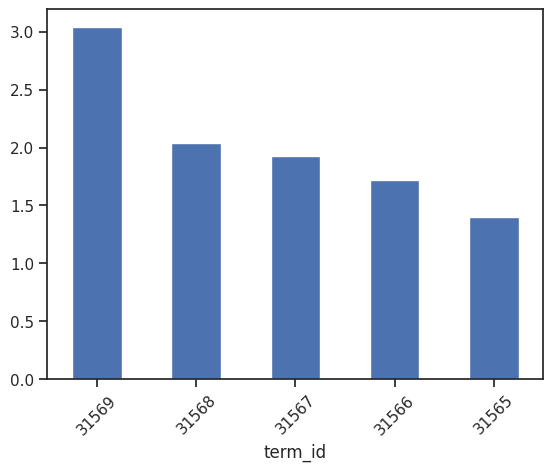

In [ ]:
EIG_PAIRS_c.exp_var.sort_values(ascending=False).head().plot.bar(rot=45)

## Pick Top K (10) Components

We pick these based on explained variance.

In [ ]:
#TOPS_b = EIG_PAIRS_b.sort_values('exp_var', ascending=False).head(10).reset_index(drop=True)
#TOPS_b.index.name = 'comp_id'
#TOPS_b.index = ["PC{}".format(i) for i in TOPS_b.index.tolist()]

In [ ]:
TOPS_c = EIG_PAIRS_c.sort_values('exp_var', ascending=False).head(10).reset_index(drop=True)
TOPS_c.index.name = 'comp_id'
TOPS_c.index = ["PC{}".format(i) for i in TOPS_c.index.tolist()]

## Show Loadings

Loadings sow the contribution of each term to the component. \
We'll just look at the topi 10 words for the first two components in the Book version.

In [ ]:
#LOADINGS_b = TOPS_b[TERM_IDX].T
#LOADINGS_b.index.name = 'term_id'

In [ ]:
#LOADINGS_b.head().style.background_gradient()

In [ ]:
#LOADINGS_b['term_str'] = LOADINGS_b.apply(lambda x: VOCAB.loc[int(x.name)].term_str, 1)

In [ ]:
#lb0_pos = LOADINGS_b.sort_values('PC0', ascending=True).head(10).term_str.str.cat(sep=' ')
#lb0_neg = LOADINGS_b.sort_values('PC0', ascending=False).head(10).term_str.str.cat(sep=' ')
#lb1_pos = LOADINGS_b.sort_values('PC1', ascending=True).head(10).term_str.str.cat(sep=' ')
#lb1_neg = LOADINGS_b.sort_values('PC1', ascending=False).head(10).term_str.str.cat(sep=' ')

In [ ]:
#print('Books PC0+', lb0_pos)
#print('Books PC0-', lb0_neg)
#print('Books PC1+', lb1_pos)
#print('Books PC1-', lb1_neg)

# Project Docs onto New Subspace

We get the dot product of the DTM matrix and the new component matrix, which we will call DCM -- for document-component matrix. \
This has the effect of replacing the features of the DTM with the features of the transposed component matrix.

In [ ]:
DCM_c = TFIDF_c.dot(TOPS_c[TERM_IDX].T)
#DCM_b = TFIDF_b.dot(TOPS_b[TERM_IDX].T)

We add metadata to our new, reduced matrices for display purposes.

In [ ]:
#DCM_b['label'] = LIB.author
#DCM_b['title'] = LIB.book_title

In [ ]:
DCM_c['label'] = DCM_c.apply(lambda x: LIB.author[x.name[0]], 1)
DCM_c['title'] = DCM_c.apply(lambda x: LIB.book_title[x.name[0]], 1)

In [ ]:
DCM_c.head().style.background_gradient()

In [ ]:
#DCM_b.head().style.background_gradient()

# Visualize

In [ ]:
def vis_pcs(M, a, b, prefix='PC'):
    fig = px.scatter(M, prefix + str(a), prefix + str(b),
                        color='label',
                        hover_name='title', marginal_x='box')
    fig.show()

## Chaps, PC 0 and 1

In [ ]:
vis_pcs(DCM_c, 0, 1)

## Chaps, PC 1 and 2

In [ ]:
vis_pcs(DCM_c, 1, 2)

## Chaps, PC 2 and 3

In [ ]:
vis_pcs(DCM_c, 2, 3)

## Books, PC 0 and 1

In [ ]:
#vis_pcs(DCM_b, 0, 1)

## Books, PC 1 and 2

In [ ]:
#vis_pcs(DCM_b, 1, 2)

## Books, PC 2 and 3

In [ ]:
#vis_pcs(DCM_b, 2, 3)

# Compare to Scikit Learn

In [ ]:
pca_engine = PCA(n_components=10)

In [ ]:
#DCM_sk_b = pd.DataFrame(pca_engine.fit_transform(TFIDF_b), index=TFIDF_b.index)
#DCM_sk_b.columns = ['PC{}'.format(i) for i in DCM_sk_b.columns]
#DCM_sk_b['label'] = LIB.author
#DCM_sk_b['title'] = LIB.book_title

In [ ]:
#DCM_sk_b.head().style.background_gradient()

In [ ]:
DCM_sk_c = pd.DataFrame(pca_engine.fit_transform(TFIDF_c), index=TFIDF_c.index)
DCM_sk_c.columns = ['PC{}'.format(i) for i in DCM_sk_c.columns]
DCM_sk_c['label'] = DCM_sk_c.apply(lambda x: LIB.author[x.name[0]], 1)
DCM_sk_c['title'] = DCM_sk_c.apply(lambda x: LIB.book_title[x.name[0]], 1)

In [ ]:
DCM_sk_c.head().style.background_gradient()

## Chaps, PC 0 and 1

In [ ]:
vis_pcs(DCM_sk_c, 0, 1)

## Books, PC 0 and 1

In [ ]:
#vis_pcs(DCM_sk_b, 0, 1)

In [ ]:
#px.scatter_3d(DCM_sk_b, 'PC0', 'PC1','PC2', color='label', hover_name='title', height=1000, width=1200)

## Show Loadings

In [ ]:
#LOADINGS_sk = pd.DataFrame(pca_engine.components_.T * np.sqrt(pca_engine.explained_variance_))
#LOADINGS_sk.columns = ["PC{}".format(i) for i in LOADINGS_sk.columns]

In [ ]:
#LOADINGS_sk.index = TFIDF_b.columns
#LOADINGS_sk.index.name = 'term_id'
#LOADINGS_sk['term_str'] = LOADINGS_sk.apply(lambda x: VOCAB.loc[int(x.name)].term_str, 1)

In [ ]:
#pc0_pos = LOADINGS_sk.sort_values('PC0', ascending=False).head(10).term_str.str.cat(sep=' ')
#pc0_neg = LOADINGS_sk.sort_values('PC0', ascending=True).head(10).term_str.str.cat(sep=' ')
#pc1_pos = LOADINGS_sk.sort_values('PC1', ascending=False).head(10).term_str.str.cat(sep=' ')
#pc1_neg = LOADINGS_sk.sort_values('PC1', ascending=True).head(10).term_str.str.cat(sep=' ')

In [ ]:
#print('BOOKS PC0+', pc0_pos)
#print('BOOKS PC0-', pc0_neg)
#print('BOOKS PC1+', pc1_pos)
#print('BOOKS PC1-', pc1_neg)

# SAVE

In [ ]:
DCM_c.to_csv(input_dir+'PCA_DCM_chaps.csv')
TOPS_c.to_csv(input_dir+'PCA_TCM_chaps.csv')
#DCM_b.to_csv(input_dir+'PCA_DCM_books.csv')
#TOPS_b.to_csv(input_dir+'PCA_TCM_books.csv')

In [ ]:
# storing the current time in the variable
c = datetime.now()

# Displays Time
current_time = c.strftime('%H:%M:%S')
print('Current Time is:', current_time)

Current Time is: 20:07:32
